In [10]:
! pip install -Uq langchain-nomic langchain_community tiktoken langchainhub chromadb \
 langchain langgraph tavily-python gpt4all fastembed langchain-groq langchain_huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 21.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 604.0/604.0 kB 33.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━

In [11]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_community.embeddings.fastembed import FastEmbedEmbeddings

In [12]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [13]:
import os
groq_api_key = "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"
os.environ["GROQ_API_KEY"] = groq_api_key

from langchain_groq import ChatGroq
llm = ChatGroq(model_name='Llama3-8b-8192')
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7fc4a884e170>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7fc4a8878bb0>, model_name='Llama3-8b-8192', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [14]:
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/",
]

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]
print(f"len of documents :{len(docs_list)}")

len of documents :3


Chunk the Documents to be in sync with the context window of the LLM

In [15]:
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=512,
    chunk_overlap=0
)
docs_splits = text_splitter.split_documents(docs_list)
print(f"length of document chunks generated :{len(docs_splits)}")

length of document chunks generated :370


Load the documents to vectorstore



In [16]:
vectorstore = Chroma.from_documents(documents=docs_splits,
                                    embedding=embeddings,
                                    collection_name="local-rag")

Instantiate the retriever


In [17]:
retriever = vectorstore.as_retriever(search_kwargs={"k":2})

Implement the Router



## Implement the Router



In [18]:
import time
from langchain.prompts import PromptTemplate
from langchain_core.output_parsers import JsonOutputParser
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are an expert at routing a
    user question to a vectorstore or web search. Use the vectorstore for questions on LLM  agents,
    prompt engineering, and adversarial attacks. You do not need to be stringent with the keywords
    in the question related to these topics. Otherwise, use web-search. Give a binary choice 'web_search'
    or 'vectorstore' based on the question. Return the a JSON with a single key 'datasource' and
    no premable or explaination. Question to route: {question} <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["question"],
)

start = time.time()
question_router = prompt | llm | JsonOutputParser()

question = "llm agent memory"
print(question_router.invoke({"question":question}))
end = time.time()

print(f"The time required to generate response by Router Chain in seconds:{end - start}")

{'datasource': 'vectorstore'}
The time required to generate response by Router Chain in seconds:0.30475950241088867


## Implement the Generate Chain



In [42]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are an assistant for question-answering tasks.
    Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know.
    Use three sentences maximum and keep the answer concise <|eot_id|><|start_header_id|>user<|end_header_id|>
    Question: {question}
    Context: {documents}
    Answer: <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["question", "documents"],
)
# Post-processing
def format_docs(docs):
  return "\n\n".join(doc.page_content for doc in docs)

# Chain
start = time.time()
rag_chain = prompt | llm | StrOutputParser()
question = "llm agent memory"
generation = rag_chain.invoke({"question":question, "documents":format_docs(retriever.get_relevant_documents(question))})
print(generation)
end = time.time()

print(f"The time required to generate response by RAG Chain in seconds:{end - start}")

According to the provided context, Component Two of the LLM-powered autonomous agent system is the "Memory" component.
The time required to generate response by RAG Chain in seconds:0.22742795944213867


## Implement the Retrieval Grader



In [43]:
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are a grader assessing relevance
    of a retrieved document to a user question. If the document contains keywords related to the user question,
    grade it as relevant. It does not need to be a stringent test. The goal is to filter out erroneous retrievals. \n
    Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question. \n
    Provide the binary score as a JSON with a single key 'score' and no premable or explaination.
     <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here is the retrieved document: \n\n {document} \n\n
    Here is the user question: {question} \n <|eot_id|><|start_header_id|>assistant<|end_header_id|>
    """,
    input_variables=["question", "document"],
)
start = time.time()
retrieval_grader = prompt | llm | JsonOutputParser()
question = "agent memory"
docs = retriever.invoke(question)
doc_txt = docs[1].page_content
print(retrieval_grader.invoke({"question": question, "document": doc_txt}))
end = time.time()
print(f"The time required to generate response by the retrieval grader in seconds:{end - start}")

{'score': 'yes'}
The time required to generate response by the retrieval grader in seconds:0.18570852279663086


## Implement the hallucination grader



In [44]:
# Prompt
prompt = PromptTemplate(
    template=""" <|begin_of_text|><|start_header_id|>system<|end_header_id|> You are a grader assessing whether
    an answer is grounded in / supported by a set of facts. Give a binary 'yes' or 'no' score to indicate
    whether the answer is grounded in / supported by a set of facts. Provide the binary score as a JSON with a
    single key 'score' and no preamble or explanation. <|eot_id|><|start_header_id|>user<|end_header_id|>
    Here are the facts:
    \n ------- \n
    {documents}
    \n ------- \n
    Here is the answer: {generation}  <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["generation", "documents"],
)

start = time.time()
hallucination_grader = prompt | llm | JsonOutputParser()
hallucination_grader_response  = hallucination_grader.invoke({"documents":docs, "generation":generation})
end = time.time()
print(f"The time required to generate response by the generation chain in seconds:{end - start}")
print(hallucination_grader_response)

The time required to generate response by the generation chain in seconds:0.21690011024475098
{'score': 'yes'}


## Implement the Answer Grader



In [45]:
# Prompt
prompt = PromptTemplate(
    template="""<|begin_of_text|><|start_header_id|>system<|end_header_id|> You are a grader assessing whether an
    answer is useful to resolve a question. Give a binary score 'yes' or 'no' to indicate whether the answer is
    useful to resolve a question. Provide the binary score as a JSON with a single key 'score' and no preamble or explanation.
     <|eot_id|><|start_header_id|>user<|end_header_id|> Here is the answer:
    \n ------- \n
    {generation}
    \n ------- \n
    Here is the question: {question} <|eot_id|><|start_header_id|>assistant<|end_header_id|>""",
    input_variables=["generation", "question"],
)
start = time.time()
answer_grader = prompt | llm | JsonOutputParser()
answer_grader_response = answer_grader.invoke({"generation":generation, "question":question})
end = time.time()
print(f"The time required to generate response by the answer grader in seconds:{end - start}")
print(answer_grader_response)

The time required to generate response by the answer grader in seconds:0.13029956817626953
{'score': 'yes'}


## Implement Web Search tool



In [46]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
os.environ['TAVILY_API_KEY'] = "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"
web_search_tool = TavilySearchResults(k=3)

Define the Graph State : represents state of the graph.

Define the following attributes:
* question
* generation : LLM Generation
* web_search : whether to add search
* documents : list of documents


In [63]:
from typing_extensions import TypedDict
from typing import List

class GraphState(TypedDict):
  question:str
  generation:str
  web_search:str
  documents:List[str]

## Define the Nodes



In [64]:
from langchain.schema import Document

def retrieve(state):
    """
    Retrieve documents from vectorstore

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, documents, that contains retrieved documents
    """
    print("---Retrieve---")
    question = state['question']

    documents = retriever.invoke(question)

    return {"question":question, "documents":documents}

In [65]:
def generate(state):
    """
    Generate answer using RAG on retrieved documents

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): New key added to state, generation, that contains LLM generation
    """
    print("---GENERATE---")
    question = state['question']
    documents = state['documents']

    generation = rag_chain.invoke({"question":question, "documents":documents})

    return {"documents": documents, "question": question, "generation": generation}

In [66]:
def grade_documents(state):
    """
    Determines whether the retrieved documents are relevant to the question
    If any document is not relevant, we will set a flag to run web search

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Filtered out irrelevant documents and updated web_search state
    """
    print("---GRADE DOCUMENTS---")
    documents = state['documents']
    question = state['question']

    filtered_docs = []
    web_search = "No"
    for d in documents:
      score = retrieval_grader.invoke({"document":d.page_content, "question":question})
      grade= score['score']
      if grade.lower() == "yes":

        print("---GRADE: DOCUMENT RELEVANT---")
        filtered_docs.append(d)
      else:
        print("---GRADE: DOCUMENT NOT RELEVANT---")
        # We do not include the document in filtered_docs
        # We set a flag to indicate that we want to run web search
        web_search = "Yes"
        continue
    return {"documents":filtered_docs, "web_search":web_search, "question":question}

In [100]:
def web_search(state):
    """
    Web search based based on the question

    Args:
        state (dict): The current graph state

    Returns:
        state (dict): Appended web results to documents
    """

    print("---WEB SEARCH---")
    question = state["question"]
    try:
      documents = state["documents"]
    except KeyError:
      documents = None

    # web search
    docs = web_search_tool.invoke({"query":question})
    web_results = "\n".join([d['content'] for d in docs])
    web_results = Document(page_content=web_results)
    if documents is not None:
      documents.append(web_results)
    else:
      documents = [web_results]

    return {"documents":documents, "question":question}

In [101]:
def route_question(state):
    """
    Route question to web search or RAG.

    Args:
        state (dict): The current graph state

    Returns:
        str: Next node to call
    """
    print("---ROUTE QUESTION---")
    question = state["question"]
    print(question)

    source = question_router.invoke({"question":question})
    print(source)
    print(source['datasource'])

    if source['datasource'] == "web_search":
      print("---ROUTE QUESTION TO WEB SEARCH---")
      return "websearch"
    elif source['datasource'] == 'vectorstore':
      print("---ROUTE QUESTION TO RAG---")
      return "vectorstore"

In [102]:
def decide_to_generate(state):
    """
    Determines whether to generate an answer, or add web search

    Args:
        state (dict): The current graph state

    Returns:
        str: Binary decision for next node to call
    """

    print("---ASSESS GRADED DOCUMENTS---")
    question = state["question"]
    web_search = state["web_search"]
    filtered_documents = state["documents"]

    if web_search == "yes":
      # All documents have been filtered check_relevance
      # We will re-generate a new query
      print("---DECISION: ALL DOCUMENTS ARE NOT RELEVANT TO QUESTION, INCLUDE WEB SEARCH---")
      return "websearch"
    else:
      # We have relevant documents, so generate answer
      print("---DECISION: GENERATE---")
      return "generate"

In [103]:
def grade_generation_v_documents_and_question(state):
    """
    Determines whether the generation is grounded in the document and answers question.

    Args:
        state (dict): The current graph state

    Returns:
        str: Decision for next node to call
    """
    print("---CHECK HALLUCINATIONS---")
    question = state["question"]
    documents = state["documents"]
    generation = state["generation"]

    score = hallucination_grader.invoke({"documents":documents, "generation":generation})
    grade = score['score']

    # Check hallucination
    if grade == "yes":
      print("---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---")
      # Check question-answering
      print("---GRADE GENERATION vs QUESTION---")
      score = answer_grader.invoke({"generation":generation, "question":question})
      grade = score['score']
      if grade == "yes":
         print("---DECISION: GENERATION ADDRESSES QUESTION---")
         return "useful"
      else:
        print("---DECISION: GENERATION DOES NOT ADDRESS QUESTION---")
        return "not useful"
    else:
        pprint("---DECISION: GENERATION IS NOT GROUNDED IN DOCUMENTS, RE-TRY---")
        return "not supported"

## Add nodes



In [104]:
from langgraph.graph import END,START, StateGraph

workflow = StateGraph(GraphState)

workflow.add_node("websearch", web_search)
workflow.add_node("retrieve", retrieve)
workflow.add_node("grade_documents", grade_documents)
workflow.add_node("generate", generate)

## Set the Entry Point and End Point



In [105]:
workflow.set_conditional_entry_point(
    route_question,
    {
        "websearch":"websearch",
        "vectorstore":"retrieve"
    }
)
workflow.add_edge("retrieve","grade_documents")
workflow.add_conditional_edges(
    "grade_documents",
    decide_to_generate,
    {
        "generate":"generate",
        "websearch":"websearch"
    }
)
workflow.add_edge("websearch","generate")
workflow.add_conditional_edges(
    "generate",
    grade_generation_v_documents_and_question,
    {
        "not supported":"generate",
        "useful":END,
        "not useful":"websearch"
    }
)

In [106]:
app = workflow.compile()

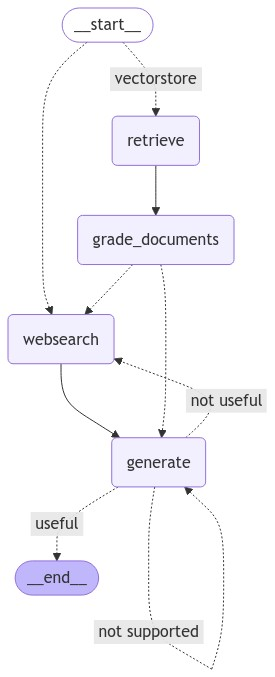

In [107]:
from IPython.display import Image, display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [112]:
from pprint import pprint
inputs = {"question": "What is prompt engineering?"}
for output in app.stream(inputs):
    for key, value in output.items():
        pprint(f"Finished running: {key}:")

---ROUTE QUESTION---
What is prompt engineering?
{'datasource': 'vectorstore'}
vectorstore
---ROUTE QUESTION TO RAG---
---Retrieve---
'Finished running: retrieve:'
---GRADE DOCUMENTS---
---GRADE: DOCUMENT RELEVANT---
---GRADE: DOCUMENT RELEVANT---
---ASSESS GRADED DOCUMENTS---
---DECISION: GENERATE---
'Finished running: grade_documents:'
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
'Finished running: generate:'


In [113]:
pprint(value["generation"])

('Prompt engineering refers to methods for communicating with large language '
 'models (LLMs) to steer their behavior for desired outcomes without updating '
 'the model weights. It is an empirical science that requires heavy '
 'experimentation and heuristics, as the effect of prompt engineering methods '
 'can vary greatly among models.')


In [110]:
from pprint import pprint
inputs = {"question": "Who are the Bears expected to draft first in the NFL draft?"}
for output in app.stream(inputs):
    for key, value in output.items():
        pprint(f"Finished running: {key}:")

---ROUTE QUESTION---
Who are the Bears expected to draft first in the NFL draft?
{'datasource': 'web_search'}
web_search
---ROUTE QUESTION TO WEB SEARCH---
---WEB SEARCH---
'Finished running: websearch:'
---GENERATE---
---CHECK HALLUCINATIONS---
---DECISION: GENERATION IS GROUNDED IN DOCUMENTS---
---GRADE GENERATION vs QUESTION---
---DECISION: GENERATION ADDRESSES QUESTION---
'Finished running: generate:'


In [111]:
pprint(value["generation"])

('The Chicago Bears are expected to draft Caleb Williams, a quarterback from '
 'USC, as the first overall pick in the 2024 NFL draft.')
